# This notebook summarise all the results presented in our paper.

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import copy
from copy import deepcopy
import geopandas as gpd

In [39]:
gov = True
rate = 7
HP_SPF = 3
root_path = os.path.join(os.path.dirname(os.getcwd()), 'FuelPoverty_data')
### fp results
All_fp_estimation_dict2019 = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_dict2019_rate{rate}{'_gov' if gov else ''}.npy"), allow_pickle=True).item()
All_fp_estimation_dict2022 = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_dict2022_rate{rate}{'_gov' if gov else ''}.npy"), allow_pickle=True).item()
All_fp_estimation_HP_dict2019 = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_HP_dict2019_rate{rate}{'_gov' if gov else ''}.npy"), allow_pickle=True).item()
All_fp_estimation_HP_dict2022 = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_HP_dict2022_rate{rate}{'_gov' if gov else ''}.npy"), allow_pickle=True).item()

All_fp_estimation_dict2019_network = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_dict2019_rate{rate}{'_gov' if gov else ''}_network_SPF{HP_SPF}.npy"), allow_pickle=True).item()
All_fp_estimation_dict2022_network = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_dict2022_rate{rate}{'_gov' if gov else ''}_network_SPF{HP_SPF}.npy"), allow_pickle=True).item()
All_fp_estimation_HP_dict2019_network = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_HP_dict2019_rate{rate}{'_gov' if gov else ''}_network_SPF{HP_SPF}.npy"), allow_pickle=True).item()
All_fp_estimation_HP_dict2022_network = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_fp_estimation_HP_dict2022_rate{rate}{'_gov' if gov else ''}_network_SPF{HP_SPF}.npy"), allow_pickle=True).item()

# correct some region names for consistency
def mod_name(dict):
    dict["City of Edinburgh"] = dict.pop("Edinburgh, City of")
    dict["Yorkshire and The Humber"] = dict.pop("Yorkshire and the Humber")
    dict["East of England"] = dict.pop("East")

mod_name(All_fp_estimation_dict2019)
mod_name(All_fp_estimation_dict2022)
mod_name(All_fp_estimation_HP_dict2019)
mod_name(All_fp_estimation_HP_dict2022)
mod_name(All_fp_estimation_dict2019_network)
mod_name(All_fp_estimation_dict2022_network)
mod_name(All_fp_estimation_HP_dict2019_network)
mod_name(All_fp_estimation_HP_dict2022_network)

In [40]:
np.allclose(np.array(list(All_fp_estimation_dict2022.values())), np.array(list(All_fp_estimation_dict2022_network.values())))

True

In [41]:
# GHG emission results
GHG_reduction_rate_dict = np.load(os.path.join(root_path, "GHG_reduction_rate_dict.npy"), allow_pickle=True).item()
All_la_GHG_dict = np.load(os.path.join(root_path, "All_la_GHG_dict.npy"), allow_pickle=True).item()
All_la_GHG_HP_dict = np.load(os.path.join(root_path, "All_la_GHG_HP_dict.npy"), allow_pickle=True).item()

mod_name(GHG_reduction_rate_dict)
mod_name(All_la_GHG_dict)
mod_name(All_la_GHG_HP_dict)

In [42]:
# network upgrade cost
network_root_path = os.path.join(root_path, "UKM_PrimarySubstation_Data")
upgrade_cost_df = pd.read_csv(os.path.join(network_root_path, "reg_upgrade_cost.csv"))

reg2totcost = {upgrade_cost_df.iloc[i]["RegCode"]:upgrade_cost_df.iloc[i]["Upgrade Cost (M£)"] for i in range(len(upgrade_cost_df))}
reg2avecost = {upgrade_cost_df.iloc[i]["RegCode"]:upgrade_cost_df.iloc[i]["Upgrade Cost (M£)"]/upgrade_cost_df.iloc[i]["Number of PS"] for i in range(len(upgrade_cost_df))}
reg2PSno = {upgrade_cost_df.iloc[i]["RegCode"]:upgrade_cost_df.iloc[i]["Number of PS"] for i in range(len(upgrade_cost_df))}

In [43]:
# offgas rate
All_nongas_res_dict = np.load(os.path.join(os.getcwd(), "data_for_plot", f"All_nongas_res_dict.npy"), allow_pickle=True).item()
mod_name(All_nongas_res_dict)

In [44]:
map_df = gpd.read_file(os.path.join(os.getcwd(), "data_for_plot", f"filtered_map.shp"))[['RegID', 'RegName']]
map_df

,RegID,RegName
0,S12000005,Clackmannanshire
1,S12000006,Dumfries and Galloway
2,S12000008,East Ayrshire
3,S12000010,East Lothian
4,S12000011,East Renfrewshire
5,S12000013,Na h-Eileanan Siar
6,S12000014,Falkirk
7,S12000017,Highland
8,S12000018,Inverclyde
9,S12000019,Midlothian


In [45]:
# now concat all the previous results to a single df
res_df = map_df.copy()
res_df["fp_2019(%)"] = map_df["RegName"].map(All_fp_estimation_dict2019)
res_df["fp_2022(%)"] = map_df["RegName"].map(All_fp_estimation_dict2022)
res_df["fp_2019_HP_plus_upfront(%)"] = map_df["RegName"].map(All_fp_estimation_HP_dict2019)
res_df["fp_2022_HP_plus_upfront(%)"] = map_df["RegName"].map(All_fp_estimation_HP_dict2022)
res_df["fp_2019_HP_plus_upfront_plus_network(%)"] = map_df["RegName"].map(All_fp_estimation_HP_dict2019_network)
res_df["fp_2022_HP_plus_upfront_plus_network(%)"] = map_df["RegName"].map(All_fp_estimation_HP_dict2022_network)

res_df["off_gas_GHG_emission(kgCO2e)"] = map_df["RegName"].map(All_la_GHG_dict)
res_df["off_gas_GHG_emission_HP(kgCO2e)"] = map_df["RegName"].map(All_la_GHG_HP_dict)
res_df["off_gas_GHG_reduction_rate(%)"] = map_df["RegName"].map(GHG_reduction_rate_dict)

res_df["network_upgrade_cost(M£)"] = map_df["RegID"].map(reg2totcost)
res_df["network_upgrade_cost_per_PS(M£)"] = map_df["RegID"].map(reg2avecost)
res_df["number_of_PS"] = map_df["RegID"].map(reg2PSno)

res_df["off_gas_rate(%)"] = map_df["RegName"].map(All_nongas_res_dict)

In [46]:
# save the results
res_df.to_csv(os.path.join(os.getcwd(), "data_for_plot", f"all_paper_outputs.csv"), index=False)

In [47]:
### test if the results are correctly stored
res_df_test = res_df.copy()
res_df_test["fp_rel_red_2019"] = (res_df["fp_2019(%)"] - res_df["fp_2019_HP_plus_upfront_plus_network(%)"])/res_df["fp_2019(%)"]
res_df_test["fp_rel_red_2022"] = (res_df["fp_2022(%)"] - res_df["fp_2022_HP_plus_upfront_plus_network(%)"])/res_df["fp_2022(%)"]

res_df_test = res_df_test[["fp_2019(%)", "fp_2022(%)", "fp_rel_red_2019", "fp_rel_red_2022", "off_gas_GHG_reduction_rate(%)", "off_gas_rate(%)", "network_upgrade_cost_per_PS(M£)"]]


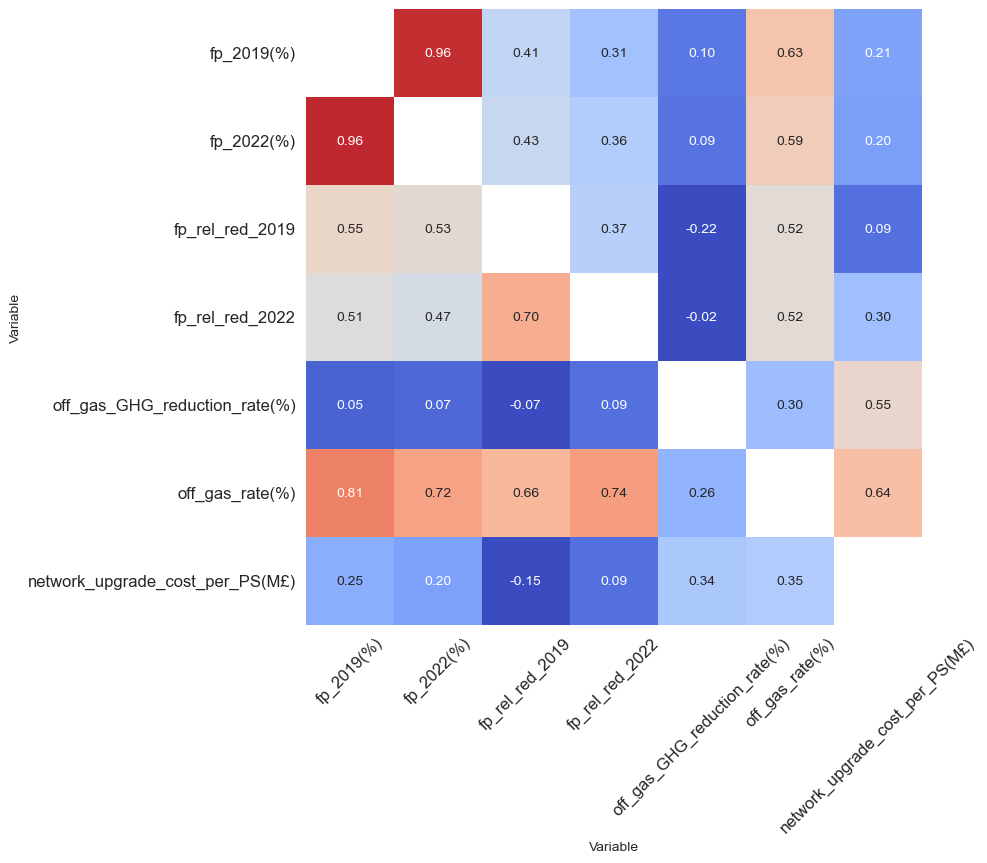

In [48]:
# plot a heatmap to check the results
from scipy.stats import spearmanr, pearsonr, kendalltau
def corrfunc_pear(x, y, **kws):
    r, _ = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("pr = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

def corrfunc_spear(x, y, **kws):
    r, _ = spearmanr(x, y)
    ax = plt.gca()
    ax.annotate("spr = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    
### The correlation is the absolute value
from matplotlib import rcParams
# Set up the aesthetics for the plot
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12

# Calculate the Pearson correlation for the lower triangle
pearson_corr = res_df_test.corr(method='pearson')
mask_pearson = np.triu(np.ones_like(pearson_corr, dtype=bool))
pearson_corr[mask_pearson] = 0

# Calculate the Spearman correlation for the upper triangle
spearman_corr = res_df_test.corr(method='spearman')
mask_spearman = np.tril(np.ones_like(spearman_corr, dtype=bool))
spearman_corr[mask_spearman] = 0

# Combine the two correlation matrices
combined_corr = pearson_corr + spearman_corr

# Set the diagonal elements to None (or any other value you prefer)
np.fill_diagonal(combined_corr.values, None)

# Create the correlation heatmap using Seaborn
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(combined_corr, annot=True, fmt='.2f', cmap='coolwarm', vmin=0, vmax=1, square=True, cbar=False, ax=ax)
# ax.set_title("Combined Correlation Heatmap", fontsize=16, fontweight='bold')

# Set axis labels
ax.set_xlabel("Variable")
ax.set_ylabel("Variable")

plt.xticks(rotation = 45)
# turn off grid
ax.grid(False)
plt.show()

In [50]:
res_df_test.isna().sum()

fp_2019(%)                         0
fp_2022(%)                         0
fp_rel_red_2019                    0
fp_rel_red_2022                    0
off_gas_GHG_reduction_rate(%)      0
off_gas_rate(%)                    0
network_upgrade_cost_per_PS(M£)    0
dtype: int64